First of all, we load our packages as always

In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

Let us start out with an example where we sample from the covariance matrix Sigma $= \left(\begin{array}{cc} 5 & 1\\1 & 2 \end{array} \right)$

In [3]:
Sigma = np.array([[5, 1], [1, 2]])
Mean = [0,0]

We sample from a normal distribution with mean at the origin and covariance matrix Sigma

(-8.0, 10.0, -6.0, 6.0)

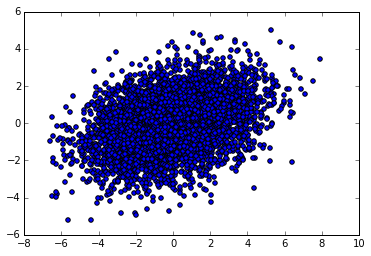

In [4]:
x, y = np.random.multivariate_normal(Mean, Sigma, 5000).T
plt.scatter(x, y)
plt.axis('equal')


Let's compute the eigenvalue decomposition of Sigma

In [5]:
evals, evecs = np.linalg.eig(Sigma)

Let's take a look at the eigenvalues

In [6]:
evals

array([ 5.30277564,  1.69722436])

Ordering the eigenvalues from highest to lowest, we get $\lambda_1 = 5.30, \lambda_2 = 1.67$. Does this fit what we see? What if we change the covariance matrix to Sigma $= \left(\begin{array}{cc} 5 & -1\\-1 & 2 \end{array} \right)$

array([ 5.30277564,  1.69722436])

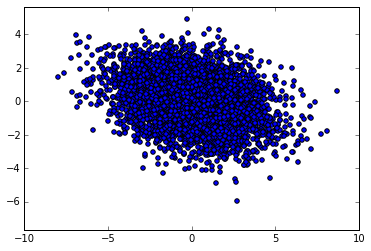

In [7]:
Sigma = np.array([[5, -1], [-1, 2]])
x, y = np.random.multivariate_normal(Mean, Sigma, 5000).T
plt.scatter(x, y)
plt.axis('equal')
evals, evecs = np.linalg.eig(Sigma)
evals

Why does this change of dataset orientation make perfect sense?

Next, let's compute the dataset covariance for good measure!

In [8]:
c = np.cov(x,y)
c

array([[ 5.04332907, -0.94460418],
       [-0.94460418,  1.98683945]])

Hopla! It's not the same as Sigma! Why is that?

Let's try a different Sigma altogether

In [9]:
Sigma = [[1.0250, -0.0433], [-0.0433, 0.9750]]

array([ 1.03080885,  0.94040216])

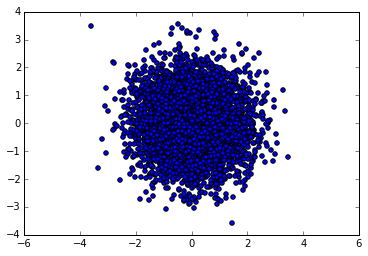

In [10]:
x, y = np.random.multivariate_normal(Mean, Sigma, 5000).T
plt.scatter(x, y)
plt.axis('equal')
evals, evecs = np.linalg.eig(np.cov(x,y))
evals

We see that $\lambda_1 = 1.07$ and $\lambda_2 = 0.95$, that is $\lambda_1 \approx \lambda_2$. This corresponds well to the dataset having near-spherical shape

Let's try a final example!

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


array([  4.44089210e-16,   4.07500549e+00])

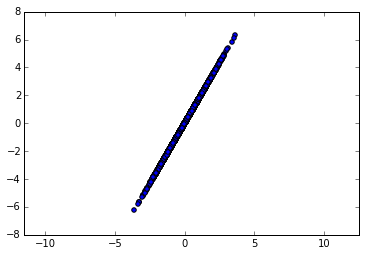

In [11]:
Sigma = [[1.0000, 1.7321], [1.7321, 3.0000]]
x, y = np.random.multivariate_normal(Mean, Sigma, 5000).T
plt.scatter(x, y)
plt.axis('equal')
evals, evecs = np.linalg.eig(np.cov(x,y))
evals

We see that for this dataset, $\lambda_1 = 4.03$ while $\lambda_2 = 0$. When the eigenvalues are not all positive (non-zero), the covariance matrix is not *positive definite*, which makes python complain. Another effect is that the data lives on a lower-dimensional linear subspace.

Note that all these examples correspond to examples that we saw back in Lecture 2 for diagonal covariance matrices -- only with those matrices, we could only represent datasets whose orientations were along the vector space axes.

**But the eigenvalue decomposition gives us more than dataset shape!**

Let us return to the first covariance matrix Sigma and plot the dataset together with the two eigenvectors

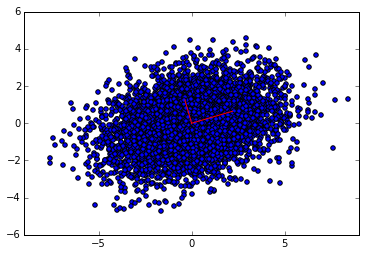

In [12]:
Sigma = np.array([[5, 1], [1, 2]])
x, y = np.random.multivariate_normal(Mean, Sigma, 5000).T
DataSigma = np.cov(x,y)
plt.scatter(x, y)
plt.axis('equal')
evals, evecs = np.linalg.eig(DataSigma)

# Compute the corresponding standard deviations
s0 = np.sqrt(evals[0])
s1 = np.sqrt(evals[1])

plt.plot([0, s0*evecs[0,0]], [0, s0*evecs[1,0]], 'r')
plt.plot([0, s1*evecs[0,1]], [0, s1*evecs[1,1]], 'r')

In the above, we used a few facts from the lectures for our visualization:
* The eigenvalue decomposition diagonalizes the covariance matrix. The diagonal matrix with eigenvalues along the diagonal is the covariance matrix in the basis given by the eigenvectors.
* We plotted the directions of the eigenvectors in red, and see that indeed, as we observed in Lecture 2 when viewing diagonal covariance matrices, these were parallel to the axes.
* In a diagonal covariance matrix, the diagonal elements are variances. The square root of a variance is a standard deviation, and the length of the two red vectors correspond, indeed, to the datasets projected onto the subspace spanned by that 
* The subspaces spanned by these two vectors are *principal components*


**NB!** In all the above, the data had mean 0. Now, when you compute covariance using the covariance formula, the mean is automatically deducted. But when you start plotting eigenvectors, they are not -- in this case your eigenvectors need to start at the mean. Also, if you are computing the covariance via formulas like $\mathbf{X^TX}$, then you absolutely need to center your data first. If you are in doubt, center your data. It will almost never hurt!

**Next, let's move to an example where we study face shape**. We start by loading the dataset found in the file 'subsampled_faces.txt', which contains a subset of Tim Cootes' talking face dataset http://www-prima.inrialpes.fr/FGnet/data/01-TalkingFace/talking_face.html

In [13]:
faces = np.loadtxt('subsampled_faces.txt')
faces = np.ndarray.transpose(faces)

Next, we separate out the x- and y- coordinates

In [14]:
faces_xcoords = faces[0:68,:] #number of labelled points on image
faces_ycoords = faces[68:167,:] #why is it 167

Here's a function that will plot a given face. Let's try it on the first face in the dataset.

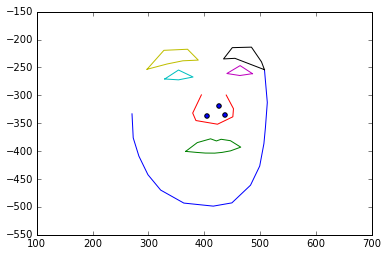

In [15]:
def plotface(face):
    x = face[range(0,68)]
    y = -face[range(68,136)] # 68*2 + 10?
    plt.plot(x[1:15], y[1:15])
    plt.hold(True)
    x1 = np.concatenate([x[range(48,60)],x[range(48,49)]])
    plt.plot(np.concatenate([x[range(48,60)],x[range(48,49)]]), np.concatenate([y[range(48,60)],y[range(48,49)]]))
    plt.plot(x[range(38,45)], y[range(38,45)])
    plt.plot(np.concatenate([x[range(27,31)], x[range(27,28)]]), np.concatenate([y[range(27,31)], y[range(27,28)]]))
    plt.plot(np.concatenate([x[range(32, 36)], x[range(32, 33)]]), np.concatenate([y[range(32, 36)], y[range(32, 33)]]))
    plt.plot(np.concatenate([x[range(21, 27)], x[range(21, 22)]]), np.concatenate([y[range(21, 27)], y[range(21, 22)]]))
    plt.plot(np.concatenate([x[range(14, 20)], x[range(14, 15)]]), np.concatenate([y[range(14, 20)], y[range(14, 15)]]))
    plt.scatter(np.concatenate([x[range(46, 48)], x[range(67, 68)]]), np.concatenate([y[range(46, 48)], y[range(67,68)]]))
    plt.axis('equal')   

plotface(faces[:,0])

Let's next compute a mean face and plot it.

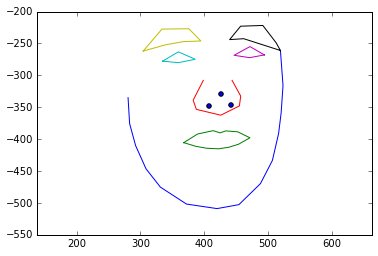

In [40]:
meanface = np.mean(faces, 1)
plotface(meanface)

Next, let's perform PCA on the face dataset

In [22]:
Sigma = np.cov(faces)
evals, evecs = np.linalg.eig(Sigma)

Let's start out by plotting the projected variance on each principal component

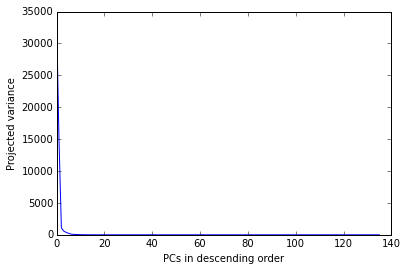

In [23]:
plt.plot(evals)
plt.xlabel('PCs in descending order')
plt.ylabel('Projected variance')

Next, let's compute and plot the cumulative variance in percent

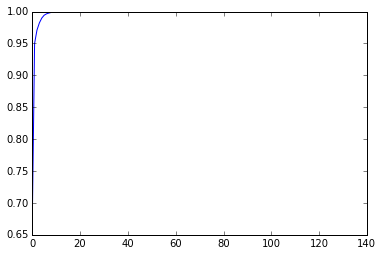

In [24]:
c_var = np.cumsum(evals/np.sum(evals))
plt.plot(c_var)

We see that very much of the variance can be described by a few principal components. Let's look at the values themselves

In [25]:
c_var[0:10]

array([ 0.65875297,  0.95014802,  0.97104632,  0.98228118,  0.98978756,
        0.99432228,  0.99652441,  0.99776936,  0.99869397,  0.99921436])

We see that two PCs describe 95 % of the variance, and six PCs describe 99 %. Why do we need so few?

Next, let's visualize the movement along the first PC by plotting seven points along the PC, each one standard deviation apart. That is, let us plot

$m - 3 \sqrt{\lambda_1} e_1$

$m - 2 \sqrt{\lambda_1} e_1$

$m - \sqrt{\lambda_1} e_1$

$m$

$m + \sqrt{\lambda_1} e_1$

$m + 2 \sqrt{\lambda_1} e_1$

$m + 3 \sqrt{\lambda_1} e_1$

In [20]:
e1 = evecs[:,0]
lambda1 = evals[0]
std1 = np.sqrt(lambda1)

faces_along_pc = np.zeros((7,136))


Now, let's look at the second PC

In [21]:
e2 = evecs[:,1]
lambda2 = evals[1]
std2 = np.sqrt(lambda2)

faces_along_pc = np.zeros((7,136))

# Fill in the rest

In [22]:
e3 = evecs[:,2]
lambda3 = evals[2]
std3 = np.sqrt(lambda3)

faces_along_pc = np.zeros((7,136))

# Fill in the rest

In [23]:
e4 = evecs[:,3]
lambda4 = evals[3]
std4 = np.sqrt(lambda4)

faces_along_pc = np.zeros((7,136))

# Fill in the rest